# JAWS  
🦈🦈🦈🦈
## Analizando los ataques de tiburones

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
sa_initial = pd.read_csv('Inputs/attacks.csv', engine='python')

# Datos iniciales

In [3]:
sa_initial

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
t_rows = sa_initial.shape[0]
print(t_rows)

25723


In [5]:
sa_initial.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

## Validez de los datos

In [6]:
def valid_columns(x):
    y=x.isnull().sum().sort_values(ascending=False)
    return y
valid_items = valid_columns(sa_initial)

**Ratios de filas llenas vs número de filas (por columna):**

In [7]:
valid_ratio = pd.Series([(t_rows-x)/t_rows for x in valid_items])
print(valid_ratio)

0     0.000039
1     0.000078
2     0.114606
3     0.134665
4     0.134938
5     0.223030
6     0.223846
7     0.224002
8     0.224041
9     0.227306
10    0.236831
11    0.243051
12    0.243906
13    0.244334
14    0.244839
15    0.244917
16    0.244956
17    0.244995
18    0.244995
19    0.244995
20    0.244995
21    0.244995
22    0.245267
23    0.338296
dtype: float64


# Limpieza de datos

## Eliminando las columnas vacías 

In [8]:
sa_empty_rows=sa_initial.drop(columns=['Unnamed: 23', 'Unnamed: 22'])

## Eliminando las filas vacías

In [9]:
columns = list(sa_empty_rows.columns)
intrested_columns=['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ']
sa_clean = sa_empty_rows
#como lo hago sin crear una copia
sa_clean.dropna(how='all', subset=intrested_columns, inplace=True)
sa_clean

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8�N, 79�W",NaN,Jules Patterson,M,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


## Renombrando columnas

In [10]:
sa_clean.rename(columns={'Sex ':'Sex',
                          'Species ':'Species',
                          'Fatal (Y/N)':'Fatal'}, 
                 inplace=True)

# Leyendo los Datos

## Validez de los datos: 

Según el DataFrame limpio, muchos de los atques registrados no contienen la información de la hora del ataque, la especie de tiburón y la edad de la victima. 

Mis hipótesis se basarán en aquellos aspectos que contienen una muestra más grande. 

Crearé una lista e iré metiendo aquellas columnas que considere que tienen datos lo suficientemente fiables. 

In [11]:
columns=[]

In [12]:
valid_columns(sa_clean)

Time                      3354
Species                   2838
Age                       2831
Sex                        565
Activity                   544
Location                   540
Fatal                      539
Area                       455
Name                       210
Country                     50
Injury                      28
Investigator or Source      17
Type                         4
Year                         2
Case Number                  1
href formula                 1
Case Number.2                0
pdf                          0
href                         0
Case Number.1                0
Date                         0
original order               0
dtype: int64

## 1. Año 

Eliminando filas que corresponden al año 0.0 
Creando una nueva base de datos con los ataques que tienen un año registrado

In [13]:
%matplotlib inline
x=sa_clean.Year.value_counts(ascending=False).head(60)
x=x.sort_index(ascending=True)
x

0.0       125
1929.0     38
1942.0     41
1950.0     43
1954.0     42
1955.0     43
1956.0     51
1957.0     41
1958.0     54
1959.0     93
1960.0     93
1961.0     78
1962.0     86
1963.0     61
1964.0     66
1965.0     51
1966.0     58
1967.0     48
1968.0     47
1970.0     42
1974.0     38
1975.0     49
1976.0     39
1981.0     49
1982.0     40
1983.0     50
1984.0     41
1985.0     37
1986.0     39
1988.0     55
1989.0     53
1990.0     38
1991.0     38
1992.0     56
1993.0     56
1994.0     56
1995.0     76
1996.0     61
1997.0     57
1998.0     65
1999.0     66
2000.0     97
2001.0     92
2002.0     88
2003.0     92
2004.0     92
2005.0    103
2006.0    103
2007.0    112
2008.0    122
2009.0    120
2010.0    101
2011.0    128
2012.0    117
2013.0    122
2014.0    127
2015.0    143
2016.0    130
2017.0    136
2018.0     53
Name: Year, dtype: int64

In [14]:
sa_clean["Year"]=sa_clean["Year"].fillna(0).astype(int)

Cambiando el 0 por Nan

sa_clean.loc[sa_clean['Year'] == 0,'Year'] = np.nan

In [15]:
x=sa_clean.Year.value_counts(ascending=False).head(60)
x=x.sort_index()

**Append columna 'Year'?   ----->    SI**

In [16]:
columns.append('Year')

## 2. País

In [17]:
sa_clean.Country.value_counts().head(40)

USA                 2229
AUSTRALIA           1338
SOUTH AFRICA         579
PAPUA NEW GUINEA     134
NEW ZEALAND          128
BRAZIL               112
BAHAMAS              109
MEXICO                89
ITALY                 71
FIJI                  62
PHILIPPINES           61
REUNION               60
NEW CALEDONIA         53
CUBA                  46
MOZAMBIQUE            45
SPAIN                 44
INDIA                 40
EGYPT                 38
CROATIA               34
JAPAN                 34
PANAMA                32
SOLOMON ISLANDS       30
IRAN                  29
JAMAICA               27
FRENCH POLYNESIA      25
GREECE                25
HONG KONG             24
INDONESIA             23
ENGLAND               23
PACIFIC OCEAN         17
ATLANTIC OCEAN        17
COSTA RICA            17
BERMUDA               16
VIETNAM               15
TONGA                 15
SRI LANKA             14
VANUATU               14
MARSHALL ISLANDS      13
FRANCE                13
TURKEY                12


**Append columna 'Country'?   ----->    SI**

In [18]:
columns.append('Country')

## 3. Area

La columna que determina el area del ataque tiene datos muy completos, la esctructura de los nombres de areas es homogenea.

In [19]:
sa_clean.Area.value_counts().head(40)

Florida                  1037
New South Wales           486
Queensland                311
Hawaii                    298
California                290
KwaZulu-Natal             213
Western Cape Province     195
Western Australia         189
South Carolina            160
Eastern Cape Province     160
South Australia           104
North Carolina            101
Victoria                   90
Pernambuco                 74
Texas                      73
Torres Strait              70
North Island               67
New Jersey                 52
Tasmania                   41
South Island               40
New York                   30
Oregon                     29
Abaco Islands              23
Northern Territory         23
Central Province           22
Virginia                   19
Havana Province            19
South Province             17
Madang Province            16
Puerto Rico                16
Massachusetts              16
Gaza                       16
Alabama                    15
New Irelan

**Append columna 'Area'?   ----->    SI**

In [20]:
columns.append('Area')

## 4. Hora

La mitad de las filas no tienen datos para 'Time' (3354 NaN de --> 6302 Datos). 

Intentaré limpiar los que hay, ya que algunos se refieren a horas en concreto mientras otros se refieren a momentos del día. 

intento fallido ` sa_clean['Hours'] = [re.sub(r'[h]*','', str(x)) for x in sa_clean['Time']]

def only_hours(x):
    if type(x)== str:
        for i in range(len(x)): 
            if x[i].isdigit():
                return int(x)
                break
            else: 
                return np.nan
    if type(x)== int:
        return x
    if type(x)== float:
        return int(x)


sa_clean['Hours'] = sa_clean.Time.apply(only_hours)

sa_clean.Hours.value_counts().head(40) `

In [21]:
sa_clean['Time'] =  [re.sub(r'[h]*','', str(x)) for x in sa_clean['Time']]

Dividiendo datos entre "Night", "Morning", "Afternoon", "Day"

In [22]:
def daytime(x): 
        if x.isdigit():
            if 0 <=int(x[0:4])< 600:
                return "Night"
            if 600 <=int(x[0:4])< 1200:
                return "Morning"
            if 1200 <=int(x[0:4])< 1800:
                return "Afternoon"
            if 1800 <=int(x[0:4])< 2400:
                return "Evening"
        elif x == "Afternoon":
            return "Afternoon"
        elif x == "Morning":
            return "Morning"
        elif x == "Nigt":
            return "Night"
        elif x == "Late afternoon":
            return "Afternoon"
        elif x == "Evening":
            return "Evening"  
        elif x == "Dusk":
            return "Evening"
        
sa_clean["Day Time"]=sa_clean.Time.apply(daytime)
sa_clean["Day Time"].value_counts().head(40)

Afternoon    1524
Morning       872
Evening       273
Night         100
Name: Day Time, dtype: int64

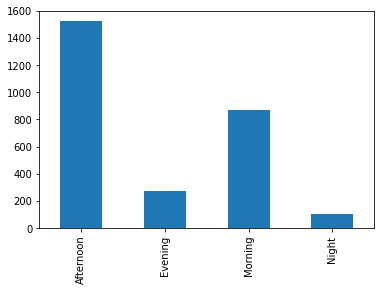

In [23]:
timeline = ["Morning", "Afternoon", "Evening", "Night"]
sa_clean["Day Time"].value_counts().sort_index().plot.bar()

**Append columna 'Time'?   ----->    NO**

**Append columna 'Day Time'?   ----->    SI**

In [24]:
columns.append('Day Time')

## 5. Fatalidad



La mayoría de los datos de la columna "Fatal" entran en Y o N. Por lo tanto están bastante limpios. 

In [25]:
sa_clean.Fatal.value_counts().head(40)

N          4293
Y          1388
UNKNOWN      71
 N            7
2017          1
y             1
N             1
M             1
Name: Fatal, dtype: int64

Con la función keep_YN, aquellos datos que no estén dentro de Y o N se registrarán como Unknown

In [26]:
def keep_YN(x):
    if x=='Y':
        return x
    if x=='N':
        return x
    if x==' N':
        return 'N'
    else: 
        return 'Unknown'

In [27]:
sa_clean["Fatal"] = sa_clean.Fatal.apply(keep_YN)

In [28]:
sa_clean.Fatal.value_counts().head(40)

N          4300
Y          1388
Unknown     614
Name: Fatal, dtype: int64

**Append columna 'Fatal'?   ----->    Yes**

In [29]:
columns.append('Fatal')

## 6. Tipos de ataques

Hay una confusión en lo que se refiere a tipos de ataques, algunos están clasificados como provocados/no provocados, mientras otros registran la actividad.

Por eso cambiaré aquellos que contienen la actividad por NaN.

In [30]:
sa_clean.Type.value_counts().sum()

6298

In [31]:
sa_clean.Type.value_counts().head(50)

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

(Intentando pasar de tipos a actividades mediante una función) ... No conseguido

`def add_activity(x):
    if x=='Invalid'|'Sea Disaster'|'Boating'|'Boat'|'Questionable'|'Boatomg':`

In [32]:
activities = ['Invalid','Sea Disaster','Boating','Boat','Questionable','Boatomg','Type']

for x in activities:
    sa_clean.loc[sa_clean['Type'] == x,'Type'] = np.nan

In [33]:
sa_clean.Type.value_counts().head(50)

Unprovoked    4595
Provoked       574
Name: Type, dtype: int64

**Append columna 'Type'?   ----->    SI**

In [34]:
columns.append('Type')

## 7. Tipo de lesión

Analizando los datos de la columna injury: parecen muy ambiguos, hay algunos que se refieren a lesiones como fatal por lo tanto no es muy claro cuando el es mortal o no. 

In [35]:
sa_clean.Injury.value_counts().head(50)

FATAL                             802
Survived                           97
Foot bitten                        87
No injury                          82
Leg bitten                         72
Left foot bitten                   50
No details                         43
Right foot bitten                  39
No injury, board bitten            31
Hand bitten                        29
Thigh bitten                       27
FATAL, body not recovered          24
Calf bitten                        22
Minor injury                       22
Foot lacerated                     21
Right leg bitten                   20
Lacerations to foot                20
Arm bitten                         20
Lacerations to right foot          18
Lacerations to left foot           18
Ankle bitten                       17
Right calf bitten                  16
Minor injuries                     14
No injury to occupants             14
Heel bitten                        14
Left arm bitten                    13
Foot severed

**Append columna 'Injury'?   ----->    NO**

## 8. Actividad
La mayoría de actividades están repetidas escritas de distintas maneras, por lo tanto intentaré unificarlas

In [36]:
sa_clean.Activity.value_counts().head(60)

Surfing                           971
Swimming                          869
Fishing                           431
Spearfishing                      333
Bathing                           162
Wading                            149
Diving                            127
Standing                           99
Snorkeling                         89
Scuba diving                       76
Body boarding                      61
Body surfing                       49
Swimming                           47
Kayaking                           33
Fell overboard                     32
Pearl diving                       32
Treading water                     32
Free diving                        29
Boogie boarding                    29
Windsurfing                        19
Walking                            17
Boogie Boarding                    16
Shark fishing                      15
Floating                           14
Fishing                            13
Canoeing                           13
Surf skiing 

In [37]:
def activities(x):
        if x in ["Bathing","Swimming ", "Body surfing", "Free diving", "Free diving ", "Freediving", "Freedom Swimming", "Freedom swimming", "Skin diving"]:
            return "Swimming"
        elif x in ["Surfing", "Surfing (sitting on his board)", "Body boarding", "Boogie Boarding", "Boogie boarding", "Surf skiing", "Surf-skiing", "Sitting on surfboard", "Body-boarding"]:
            return "Surfing"
        elif x in ["Spearfishing", "Shark fishing","Fishing ", "Fishing for sharks"]:
            return "Fishing"
        elif x in ["Scuba diving", "Diving for abalone", "Pearl diving", "Diving", "Sponge diving", "Scuba Diving", "Spearfishing on Scuba", "Diving for trochus", "Free diving for abalone"]:
            return "Snorkeling"
        elif x in ["Standing", "Walking"]:
            return "Wading"
        elif x in ["Treading water", "Floating", "Dangling feet in the water"]:
            return "Treading water"
        elif x in ["Canoeing", "Rowing", "Kayak Fishing", "Kayaking / Fishing"]:
            return "Kayaking"
        elif x in ["Paddle boarding"]:
            return "Paddle boarding"
        elif x in ["Boating","Sailing", "Fishing for mackerel", "Shipwreck", "Fishing on a boat", "Fishing boat"]:
            return "Boating"
        elif x in ["Fell overboard", "Fell into the water"]:
            return "Fell overboard"
        elif x in ["Kite Surfing"]:
            return "Kite Surfing"
        elif x in ["Windsurfing"]:
            return "Windsurfing"
        elif x in ["Surf fishing"]:
            return "Surf fishing"
        elif x in ["Paddle boarding"]:
            return "Paddle boarding"
        else:
            return "Other"
sa_clean["Activities"] = sa_clean.Activity.apply(activities)

sa_clean.Activities.value_counts().head(60)

Other              3883
Surfing            1121
Fishing             372
Swimming            311
Snorkeling          284
Wading              116
Treading water       51
Kayaking             41
Fell overboard       41
Boating              37
Windsurfing          19
Surf fishing         12
Paddle boarding       8
Kite Surfing          6
Name: Activities, dtype: int64

re.sub(r'surf','Surfing',sa_clean)
re.sub(r'fish','Fishing',sa_clean)
re.sub(r'swim','Swimming',sa_clean)
re.sub(r'div','Swimming',sa_clean)

In [38]:
sa_clean.Activity.value_counts().head(40)

Surfing                 971
Swimming                869
Fishing                 431
Spearfishing            333
Bathing                 162
Wading                  149
Diving                  127
Standing                 99
Snorkeling               89
Scuba diving             76
Body boarding            61
Body surfing             49
Swimming                 47
Kayaking                 33
Fell overboard           32
Pearl diving             32
Treading water           32
Free diving              29
Boogie boarding          29
Windsurfing              19
Walking                  17
Boogie Boarding          16
Shark fishing            15
Floating                 14
Fishing                  13
Canoeing                 13
Surf skiing              12
Rowing                   12
Surf-skiing              12
Surf fishing             12
Kayak Fishing            11
Fishing for sharks       11
Scuba Diving             10
Freediving               10
Sponge diving            10
Sailing             

**Append columna 'Activity'?   ----->    NO**

## Especie

La columna de especies de tiburones es muy ambigua. En algunos casos sólo se registra el tamaño del tiburón, en otros una descripción y en otros es una incógnita. 

In [39]:
sa_clean.Species.value_counts().head(40)

White shark                                           163
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        88
Tiger shark                                            73
Shark involvement prior to death unconfirmed           68
Bull shark                                             52
4' shark                                               40
6' shark                                               40
Questionable incident                                  35
1.8 m [6'] shark                                       35
Questionable                                           34
1.5 m [5'] shark                                       32
1.2 m [4'] shark                                       27
5' shark                                               26
3' shark                                               26
2 m shark                                              25
4' to 5' shark

In [40]:
sa = sa_clean[columns]
sa

,Year,Country,Area,Day Time,Fatal,Type
0,2018,USA,California,Evening,N,NaN
1,2018,USA,Georgia,None,N,Unprovoked
2,2018,USA,Hawaii,Morning,N,NaN
3,2018,AUSTRALIA,New South Wales,None,N,Unprovoked
4,2018,MEXICO,Colima,None,N,Provoked
...,...,...,...,...,...,...
6297,0,AUSTRALIA,Western Australia,None,Y,Unprovoked
6298,0,AUSTRALIA,Western Australia,None,Y,Unprovoked
6299,0,USA,North Carolina,None,Y,Unprovoked
6300,0,PANAMA,NaN,None,Y,Unprovoked


**Append columna 'Species'?   ----->    NO**

# Exportar Datos Limpios

In [41]:
sa = sa_clean[columns]

In [42]:
sa

,Year,Country,Area,Day Time,Fatal,Type
0,2018,USA,California,Evening,N,NaN
1,2018,USA,Georgia,None,N,Unprovoked
2,2018,USA,Hawaii,Morning,N,NaN
3,2018,AUSTRALIA,New South Wales,None,N,Unprovoked
4,2018,MEXICO,Colima,None,N,Provoked
...,...,...,...,...,...,...
6297,0,AUSTRALIA,Western Australia,None,Y,Unprovoked
6298,0,AUSTRALIA,Western Australia,None,Y,Unprovoked
6299,0,USA,North Carolina,None,Y,Unprovoked
6300,0,PANAMA,NaN,None,Y,Unprovoked


**Exportando.........**

In [43]:
sa.to_csv('Outputs/clean_shark_attack.csv')